In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together.



<a name="1.1"></a>
### 1.1 Finding closest centroids

The algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids.


In [ ]:
# GRADED FUNCTION 1: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Assign each data point to the closest centroid

    Input:
    X: ndarray of shape (m, n) - m data points with n features
    centroids: ndarray of shape (K, n) - K centroids with n features

    Output:
    idx: ndarray of shape (m,) - index of the closest centroid for each data point
    """
    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = []
        for j in range(K):
            norm_ij = np.sum((X[i] - centroids[j]) ** 2)# to calculate the norm between (X[i] - centroids[j]) ; Squared Euclidean distance
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)# to calculate index of minimum value in distance
    

    return idx

### 1.2 Recalculating Centroid Averages

In [ ]:
# GRADED FUNCTION 2: compute_centpods

def compute_centroids(X, idx, K):
    """
    Compute new centroids based on the current assignments

    Input:
    X: ndarray of shape (m, n) - m data points with n features
    idx: ndarray of shape (m,) - current assignments
    K: int - number of clusters

    Output:
    centroids: ndarray of shape (K, n) - updated centroids
    """
    m, n = X.shape
    centroids = np.zeros((K, n))


    for k in range(K):
        points_in_cluster = X[idx == k]  #  to get a list of all data points in X assigned to centroid k
        if len(points_in_cluster) > 0: # a check to avoid division by zero when a cluster is empty
            centroids[k] =np.mean(points_in_cluster, axis=0)  # to compute the mean of the points assigned
  
    return centroids

## 1.3 The Elbow Curve Method

Exercise 3:Implement Elbow Curve method

### Description

The Elbow Method is a heuristic used to determine the optimal number of clusters (K) in K-Means clustering. It helps to find the value of K that best fits the data without overfitting.

By plotting the elbow curve, we can visually identify the point where increasing K further doesn't provide substantial improvements, thus helping us choose a suitable number of clusters for our data.

In K-Means clustering, the goal is to partition the dataset into K clusters such that the sum of squared distances between data points and their corresponding cluster centroids is minimized.

### Mathematical Expression for Distortion (Within-Cluster Sum of Squares)

Distortion can also be expressed as the average of the squared distances:

$$\text{Distortion} = \frac{1}{m} \sum_{i=1}^m \|X[i] - \mu_{\text{idx}[i]}\|^2$$

Where:
- $m$: Number of data points
- $X[i]$: Data point i
- $\mu_{\text{idx}[i]}$: Centroid assigned to $X[i]$
- $\|\cdot\|^2$: Squared Euclidean norm

### Implementing the Elbow Method

1. Run K-Means for a range of K values (e.g., 1 to 10)
2. For each K, compute the distortion
3. Plot K versus distortion
4. Identify the "elbow" point where the rate of decrease sharply changes
5. This point suggests an optimal K, balancing between model complexity and data fitting

In [ ]:
%%capture
!pip install kneed
from kneed import KneeLocator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

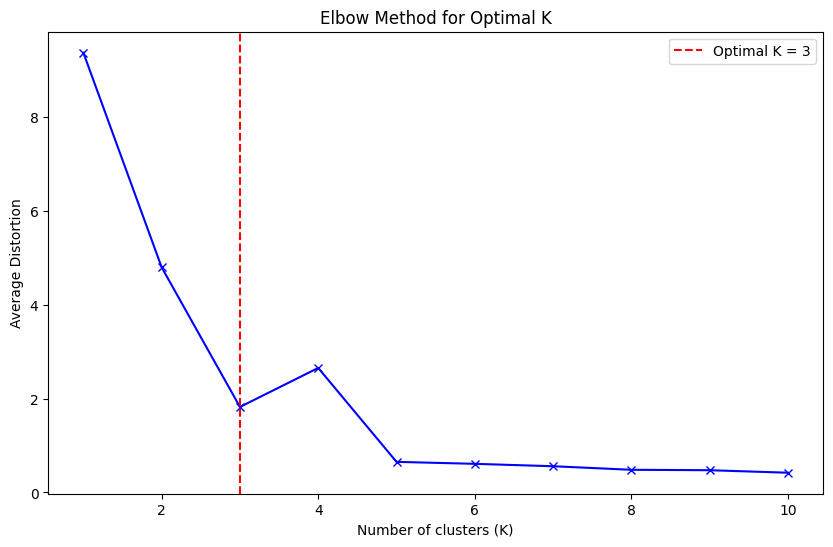

The optimal number of clusters (K) is: 3
Optimal K: 3


In [ ]:
def plot_elbow(X, max_K):
    """
    Plot the elbow curve to find the optimal K

    Input:
        X: ndarray of shape (m, n) - m data points with n features
        max_K: int - maximum number of clusters to try

    Output:
        Elbow plot
        optimal_k: int - optimal number of clusters
    """
    distortions = []
    K_range = range(1, max_K + 1)

    for K in K_range:
        centroids = X[np.random.choice(X.shape[0], K, replace=False)]

        for _ in range(10):  # Run K-means for 10 iterations
            idx = find_closest_centroids(X, centroids)
            centroids = compute_centroids(X, idx, K)



        distortion = distortion = np.mean([np.sum((X[i] - centroids[idx[i]]) ** 2) for i in range(X.shape[0])])# to calculate the distortion for certian K



        distortions.append(distortion)

    # Plot the distortion values against K
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Average Distortion')
    plt.title('Elbow Method for Optimal K')

    # Use KneeLocator to find the elbow point
    kneedle = KneeLocator(K_range, distortions, curve='convex', direction='decreasing')
    optimal_k = kneedle.elbow

    # Highlight the optimal K on the plot
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
    plt.legend()
    plt.show()

    print(f"The optimal number of clusters (K) is: {optimal_k}")
    return optimal_k

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# Find optimal K using the elbow method
optimal_k = plot_elbow(X, max_K=10)
print(f"Optimal K: {optimal_k}")

## 2 - K-means on a Sample Dataset

After completing the two functions (`find_closest_centroids` and `compute_centroids`), and plotting the elbow curve for finiding optimal clusters using 'plot_elbow'

the next step is to run the K-means algorithm on a sample dataset and visualize the results. We'll use sklearn to generate our data and implement a method to find the optimal number of clusters.

### Dataset Generation with sklearn

We use sklearn's `make_blobs` function to create a synthetic dataset for our clustering task. This function generates isotropic Gaussian blobs for clustering, allowing us to create a controlled dataset with a known number of clusters.


### Understanding the `run_kmeans` Function

We encourage you to examine the `run_kmeans` function below to understand its workings:

**Note**: You do not need to implement anything for this part. Simply run the code provided below.



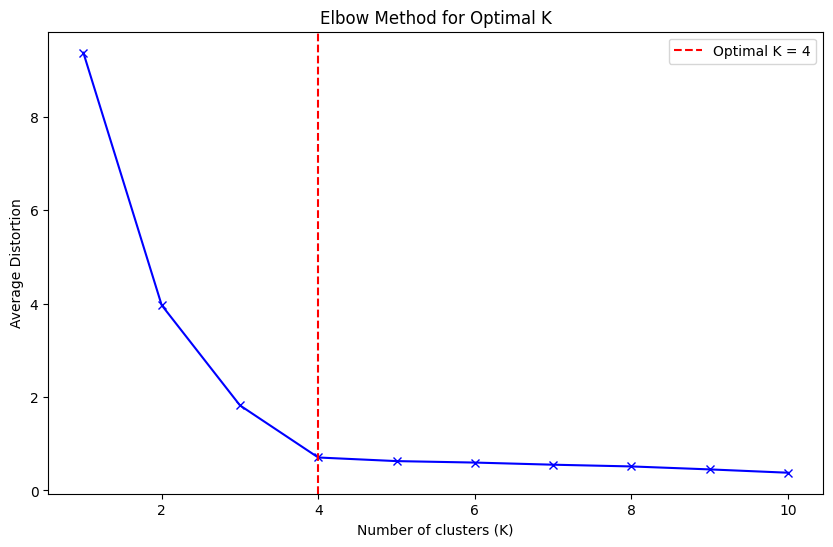

The optimal number of clusters (K) is: 4
Optimal K: 4


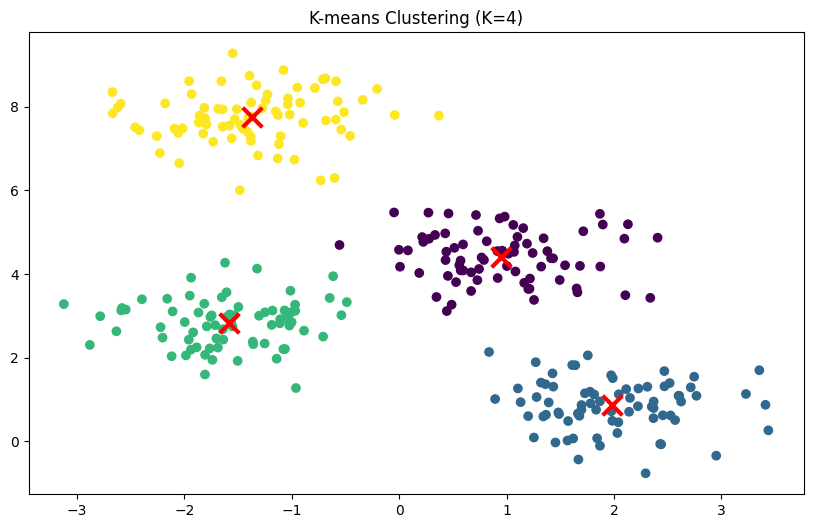

K-means clustering completed.


In [ ]:

from sklearn.datasets import make_blobs

def run_kmeans(X, K, max_iter=100):
    """
    Run the full K-means algorithm

    Input:
    X: ndarray of shape (m, n) - m data points with n features
    K: int - number of clusters
    max_iter: int - maximum number of iterations

    Output:
    centroids: ndarray of shape (K, n) - final centroids
    idx: ndarray of shape (m,) - final assignments
    """
    m, n = X.shape
    centroids = X[np.random.choice(m, K, replace=False)]

    for _ in range(max_iter):
        idx = find_closest_centroids(X, centroids)
        new_centroids = compute_centroids(X, idx, K)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
    plt.title(f'K-means Clustering (K={K})')
    plt.show()

    return centroids, idx

# Main execution
if __name__ == "__main__":
    # Generate sample data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    # Find optimal K using the elbow method
    optimal_k = plot_elbow(X, max_K=10)
    print(f"Optimal K: {optimal_k}")

    # Run K-means with the optimal K
    centroids, idx = run_kmeans(X, optimal_k)

    print("K-means clustering completed.")